## Explaining PR Curve

In [1]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, recall_score, precision_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# generate dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0, n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=0)


In [3]:
X

array([[ 0.58668116, -1.56712031],
       [ 0.91599037, -1.30067816],
       [ 1.10164467, -1.06143469],
       ...,
       [ 0.77231923, -1.52607186],
       [ 1.13544825, -0.79753181],
       [ 0.94496945, -0.94779912]])

In [4]:
y

array([0, 0, 0, ..., 0, 0, 0])

In [5]:
# split into train/test sets
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.5, random_state=42, stratify=y)

In [6]:
# fit a model
lr = LogisticRegression(solver='lbfgs')
lr.fit(X_train, y_train)


LogisticRegression()

In [7]:
# predict on test set
lr_pred = lr.predict(X_test)
accuracy_score(y_test, lr_pred)

0.9942

### Change the performance metric
Accuracy is not the best metric to use when evaluating classification as it can be misleading. Metrics that can provide better insight include:

* Confusion Matrix: a table showing correct predictions and types of incorrect predictions.
* Precision: the number of true positives divided by all positive predictions. Precision is also called Positive Predictive Value. It is a measure of a classifier's exactness. Low precision indicates a high number of false positives.
* Recall: the number of true positives divided by the number of positive values in the test data. Recall is also called Sensitivity or the True Positive Rate. It is a measure of a classifier's completeness. Low recall indicates a high number of false negatives.
* F1: Score: the weighted average of precision and recall.
Since our main objective with the dataset is to prioritize accuraltely classifying fraud cases the recall score can be considered our main metric to use for evaluating outcomes.

In [8]:
# f1 score
print('f1 score: ',f1_score(y_test, lr_pred),'\n')
# confusion matrix
print('confusion matrix: \n',pd.DataFrame(confusion_matrix(y_test, lr_pred)),'\n')
# recall score
print('recall score: ',recall_score(y_test, lr_pred))
print('precision score: ', precision_score(y_test, lr_pred))

f1 score:  0.5915492957746479 

confusion matrix: 
       0   1
0  4950   0
1    29  21 

recall score:  0.42
precision score:  1.0


### Plotting Precision Recall Curve

### [Link](https://scikit-learn.sourceforge.net/dev/modules/generated/sklearn.metrics.precision_recall_curve.html)

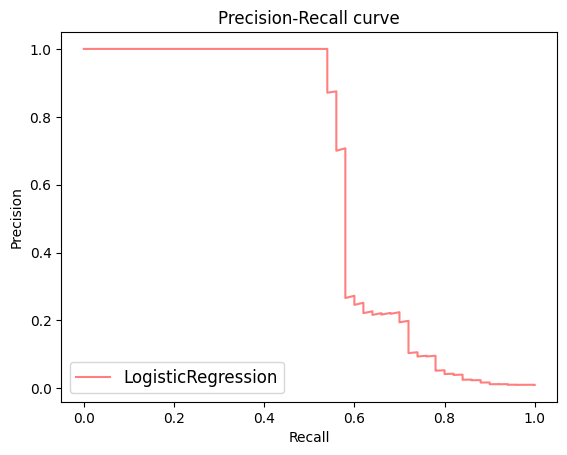

In [9]:
from sklearn.metrics import precision_recall_curve
# predict probabilities
pred_prob=lr.predict_proba(X_test) ##
# keep probabilities for the positive outcome only
y_score = pred_prob[:,1]
# calculate pr curves
precision,recall, thresholds = precision_recall_curve(y_test, y_score)
plt.plot(recall,precision, color='red', alpha=0.5,linewidth=1.5,label='LogisticRegression')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.legend(loc='lower left', fontsize = 'large')

In [10]:
pred_prob

array([[9.99410768e-01, 5.89232045e-04],
       [9.99984127e-01, 1.58727355e-05],
       [9.98225495e-01, 1.77450515e-03],
       ...,
       [9.97017090e-01, 2.98290984e-03],
       [9.99903125e-01, 9.68754880e-05],
       [9.87745802e-01, 1.22541977e-02]])

In [11]:
print(thresholds) #print(np.round(thresholds,2))
print(len(thresholds))
print(len(recall),',', len(precision))

[1.36992574e-06 2.93480113e-06 3.42032066e-06 ... 9.99576496e-01
 9.99739052e-01 9.99931029e-01]
5000
5001 , 5001


In [12]:
recall[0],precision[0]

(np.float64(1.0), np.float64(0.01))

In [13]:
recall[5000],precision[5000]

(np.float64(0.0), np.float64(1.0))

 Think --> If someone says, “Let’s reach 99% precision”, you should ask, “At what recall?”

### Plotting ROC Curve
### [Link](https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc)

Text(0, 0.5, 'True Positive Rate')

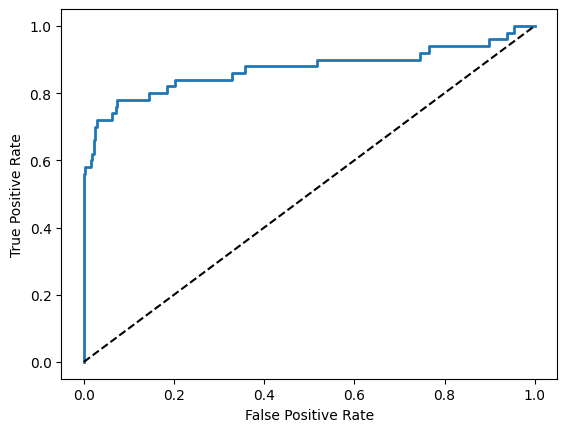

In [14]:
from sklearn.metrics import roc_curve
# predict probabilities
pred_prob=lr.predict_proba(X_test)
# keep probabilities for the positive outcome only
y_score = pred_prob[:,1]
# calculate roc curves
fpr,tpr,thresholds = roc_curve(y_test, y_score)
plt.plot(fpr,tpr,linewidth=2)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

### Area Under the Curve (AUC)
* One way to compare the classifiers is to measure the Area Under the Curve (AUC).A perfect classifier will have a ROC AUC equal to 1 wheres a purely random classifier will have a ROC AUC =1.

In [15]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_score)

np.float64(0.8718989898989898)